In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# or
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [40]:
filepath = '../data/dataset.csv'

In [41]:
df = pd.read_csv(filepath)

In [42]:
len(df)

2117

In [43]:
df['label'].unique()

array(['standing', 'sitted'], dtype=object)

In [44]:
len(df[df['label']=='standing'])

1067

In [45]:
len(df[df['label']=='sitted'])

1050

In [46]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   datetime                      2117 non-null   object 
 1   angle_elbow_r                 2117 non-null   float64
 2   angle_elbow_r_start_angle     2117 non-null   float64
 3   angle_elbow_r_end_angle       2117 non-null   float64
 4   angle_elbow_l                 2117 non-null   float64
 5   angle_elbow_l_start_angle     2117 non-null   float64
 6   angle_elbow_l_end_angle       2117 non-null   float64
 7   angle_underarm_l              2117 non-null   float64
 8   angle_underarm_l_start_angle  2117 non-null   float64
 9   angle_underarm_l_end_angle    2117 non-null   float64
 10  angle_waist_r                 2117 non-null   float64
 11  angle_waist_r_start_angle     2117 non-null   float64
 12  angle_waist_r_end_angle       2117 non-null   float64
 13  ang

In [47]:
df.describe()

,angle_elbow_r,angle_elbow_r_start_angle,angle_elbow_r_end_angle,angle_elbow_l,angle_elbow_l_start_angle,angle_elbow_l_end_angle,angle_underarm_l,angle_underarm_l_start_angle,angle_underarm_l_end_angle,angle_waist_r,angle_waist_r_start_angle,angle_waist_r_end_angle,angle_waist_l,angle_waist_l_start_angle,angle_waist_l_end_angle,angle_knee_r,angle_knee_r_start_angle,angle_knee_r_end_angle,angle_knee_l,angle_knee_l_start_angle,angle_knee_l_end_angle,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,img_w,img_h,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r
count,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.0,2117.0,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,194.740810,-296.160731,-101.419921,216.147407,65.877270,-150.270137,275.805055,37.382201,-238.422854,144.022962,-250.793351,-106.770389,176.425872,51.172598,-125.253274,219.081957,-305.690141,-86.608183,186.787761,43.846046,-142.941715,58.965077,98.942808,447.988393,456.504070,299.288994,136.542314,183.298731,119.567124,114.375122,237.433576,269.506768,147.388301,157.150168,212.683078,108.603834,158.777003,1920.0,1080.0,0.988204,0.987736,0.998674,0.998101,0.802422,0.734311,0.669994,0.644484,0.993959,0.992968,0.723477,0.718016,0.597167,0.549759
std,47.907402,72.046801,48.823209,48.161487,60.386832,69.505957,105.417058,41.228851,126.114695,45.396738,114.489809,93.465626,55.353160,45.995642,52.656756,61.823590,104.489288,73.408154,65.037575,60.101250,82.268551,47.055097,51.776056,218.708226,226.582488,122.025551,90.637674,92.115901,71.798752,73.089458,147.826811,157.606425,119.425687,122.106670,85.259374,44.853071,74.969627,0.0,0.0,0.038651,0.039745,0.003665,0.007775,0.255939,0.267183,0.282130,0.276148,0.055194,0.057029,0.264555,0.279967,0.294157,0.294185
min,1.383163,-503.365886,-179.650640,0.499176,-179.104826,-525.963757,0.052200,-173.290163,-496.344724,1.258240,-514.277473,-179.557570,0.394196,-177.214834,-493.172032,2.944680,-496.909152,-179.345220,2.101428,-177.397438,-523.730353,0.035706,0.490837,17.071185,26.749691,2.448823,0.075059,0.844767,0.220478,0.319676,0.826904,0.004506,0.306737,0.235991,4.913019,2.078750,3.458082,1920.0,1080.0,0.495280,0.510443,0.947799,0.857103,0.033699,0.032541,0.010644,0.016831,0.020292,0.013395,0.003738,0.002337,0.000362,0.000380
25%,175.426079,-323.513988,-126.634114,192.654544,42.929969,-165.499833,291.614598,16.361077,-309.155434,123.391056,-309.004613,-157.698707,153.526785,30.523405,-136.988638,187.230663,-358.264295,-126.702855,156.481792,27.512003,-153.958183,23.543129,70.319939,368.165118,372.771570,245.705098,72.237661,142.744074,68.706672,66.021094,155.073695,201.421044,85.173225,92.115018,179.435453,96.695861,103.438498,1920.0,1080.0,0.994821,0.995182,0.999120,0.999308,0.703336,0.551830,0.480074,0.423220,0.998985,0.998670,0.546110,0.534504,0.346538,0.285294
50%,190.139260,-298.726131,-108.874550,212.375540,70.906508,-146.807063,325.827897,34.508523,-290.402746,148.774340,-283.706961,-139.207640,168.430095,56.029531,-120.453951,215.680679,-332.549002,-103.

In [48]:
len(df.columns)

55

In [49]:
df.drop(['datetime'], axis=1, inplace=True)
len(df.columns)

54

In [50]:
df.columns

Index(['angle_elbow_r', 'angle_elbow_r_start_angle', 'angle_elbow_r_end_angle',
       'angle_elbow_l', 'angle_elbow_l_start_angle', 'angle_elbow_l_end_angle',
       'angle_underarm_l', 'angle_underarm_l_start_angle',
       'angle_underarm_l_end_angle', 'angle_waist_r',
       'angle_waist_r_start_angle', 'angle_waist_r_end_angle', 'angle_waist_l',
       'angle_waist_l_start_angle', 'angle_waist_l_end_angle', 'angle_knee_r',
       'angle_knee_r_start_angle', 'angle_knee_r_end_angle', 'angle_knee_l',
       'angle_knee_l_start_angle', 'angle_knee_l_end_angle',
       'width_elbow_shoulder_r', 'width_elbow_shoulder_l', 'dist_height_r',
       'dist_height_l', 'dist_width', 'height_shoulder_waist_r',
       'height_shoulder_waist_l', 'height_waist_knee_r', 'height_waist_knee_l',
       'height_knee_shoulder_r', 'height_knee_shoulder_l',
       'height_ankle_waist_r', 'height_ankle_waist_l', 'shoulder_l_r',
       'waist_l_r', 'knee_l_r', 'img_w', 'img_h', 'visibility_ear_l',
       'v

In [51]:
df['label'].unique()

array(['standing', 'sitted'], dtype=object)

In [52]:
df.head(2)

,angle_elbow_r,angle_elbow_r_start_angle,angle_elbow_r_end_angle,angle_elbow_l,angle_elbow_l_start_angle,angle_elbow_l_end_angle,angle_underarm_l,angle_underarm_l_start_angle,angle_underarm_l_end_angle,angle_waist_r,angle_waist_r_start_angle,angle_waist_r_end_angle,angle_waist_l,angle_waist_l_start_angle,angle_waist_l_end_angle,angle_knee_r,angle_knee_r_start_angle,angle_knee_r_end_angle,angle_knee_l,angle_knee_l_start_angle,angle_knee_l_end_angle,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,img_w,img_h,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r,label
0,142.495858,-299.875993,-157.380135,175.112299,8.246321,-166.865978,115.072173,13.134022,-101.938151,146.171532,-55.527786,90.643746,234.552207,-47.385944,-281.938151,104.370630,20.101584,124.472214,249.846528,22.460584,-227.385944,71.186142,90.036392,297.180593,274.543989,72.462848,177.646222,175.453806,66.947165,49.938333,244.593387,225.392139,4.212313,24.511507,53.603072,17.086079,28.128769,1920,1080,0.999912,0.999993,0.999842,0.999962,0.569096,0.781364,0.476997,0.565395,0.999999,0.999999,0.774536,0.968285,0.691619,0.805187,standing
1,135.559147,-294.863697,-159.304549,227.436648,45.000000,-182.436648,100.175237,-2.436648,-102.611885,171.199578,-78.486169,92.713409,230.769112,-51.842773,-282.611885,62.899424,38.614407,101.513831,265.671069,33.828296,-231.842773,45.804119,93.498116,261.375968,274.184158,172.772096,211.053114,218.301773,54.412901,28.159912,265.466015,246.461685,69.100828,99.850659,124.615140,65.279063,80.735397,1920,1080,0.999959,0.999983,0.998763,0.999527,0.663074,0.763611,0.548024,0.600962,0.999985,0.999993,0.773568,0.898838,0.792113,0.701938,standing


In [53]:
label_encoder = LabelEncoder()

In [54]:
df['label'] = label_encoder.fit_transform(df['label'])

In [55]:
df['label'].unique()

array([1, 0])

In [56]:
df.head(2)

,angle_elbow_r,angle_elbow_r_start_angle,angle_elbow_r_end_angle,angle_elbow_l,angle_elbow_l_start_angle,angle_elbow_l_end_angle,angle_underarm_l,angle_underarm_l_start_angle,angle_underarm_l_end_angle,angle_waist_r,angle_waist_r_start_angle,angle_waist_r_end_angle,angle_waist_l,angle_waist_l_start_angle,angle_waist_l_end_angle,angle_knee_r,angle_knee_r_start_angle,angle_knee_r_end_angle,angle_knee_l,angle_knee_l_start_angle,angle_knee_l_end_angle,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,img_w,img_h,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r,label
0,142.495858,-299.875993,-157.380135,175.112299,8.246321,-166.865978,115.072173,13.134022,-101.938151,146.171532,-55.527786,90.643746,234.552207,-47.385944,-281.938151,104.370630,20.101584,124.472214,249.846528,22.460584,-227.385944,71.186142,90.036392,297.180593,274.543989,72.462848,177.646222,175.453806,66.947165,49.938333,244.593387,225.392139,4.212313,24.511507,53.603072,17.086079,28.128769,1920,1080,0.999912,0.999993,0.999842,0.999962,0.569096,0.781364,0.476997,0.565395,0.999999,0.999999,0.774536,0.968285,0.691619,0.805187,1
1,135.559147,-294.863697,-159.304549,227.436648,45.000000,-182.436648,100.175237,-2.436648,-102.611885,171.199578,-78.486169,92.713409,230.769112,-51.842773,-282.611885,62.899424,38.614407,101.513831,265.671069,33.828296,-231.842773,45.804119,93.498116,261.375968,274.184158,172.772096,211.053114,218.301773,54.412901,28.159912,265.466015,246.461685,69.100828,99.850659,124.615140,65.279063,80.735397,1920,1080,0.999959,0.999983,0.998763,0.999527,0.663074,0.763611,0.548024,0.600962,0.999985,0.999993,0.773568,0.898838,0.792113,0.701938,1


- 'standing' - 1
- 'sitted' - 0

In [58]:
X, y = df.drop(['label'], axis=1), df['label']

In [60]:
len(X.columns)

53

In [61]:
df.columns

Index(['angle_elbow_r', 'angle_elbow_r_start_angle', 'angle_elbow_r_end_angle',
       'angle_elbow_l', 'angle_elbow_l_start_angle', 'angle_elbow_l_end_angle',
       'angle_underarm_l', 'angle_underarm_l_start_angle',
       'angle_underarm_l_end_angle', 'angle_waist_r',
       'angle_waist_r_start_angle', 'angle_waist_r_end_angle', 'angle_waist_l',
       'angle_waist_l_start_angle', 'angle_waist_l_end_angle', 'angle_knee_r',
       'angle_knee_r_start_angle', 'angle_knee_r_end_angle', 'angle_knee_l',
       'angle_knee_l_start_angle', 'angle_knee_l_end_angle',
       'width_elbow_shoulder_r', 'width_elbow_shoulder_l', 'dist_height_r',
       'dist_height_l', 'dist_width', 'height_shoulder_waist_r',
       'height_shoulder_waist_l', 'height_waist_knee_r', 'height_waist_knee_l',
       'height_knee_shoulder_r', 'height_knee_shoulder_l',
       'height_ankle_waist_r', 'height_ankle_waist_l', 'shoulder_l_r',
       'waist_l_r', 'knee_l_r', 'img_w', 'img_h', 'visibility_ear_l',
       'v

In [63]:
import matplotlib.pyplot as plt
import math

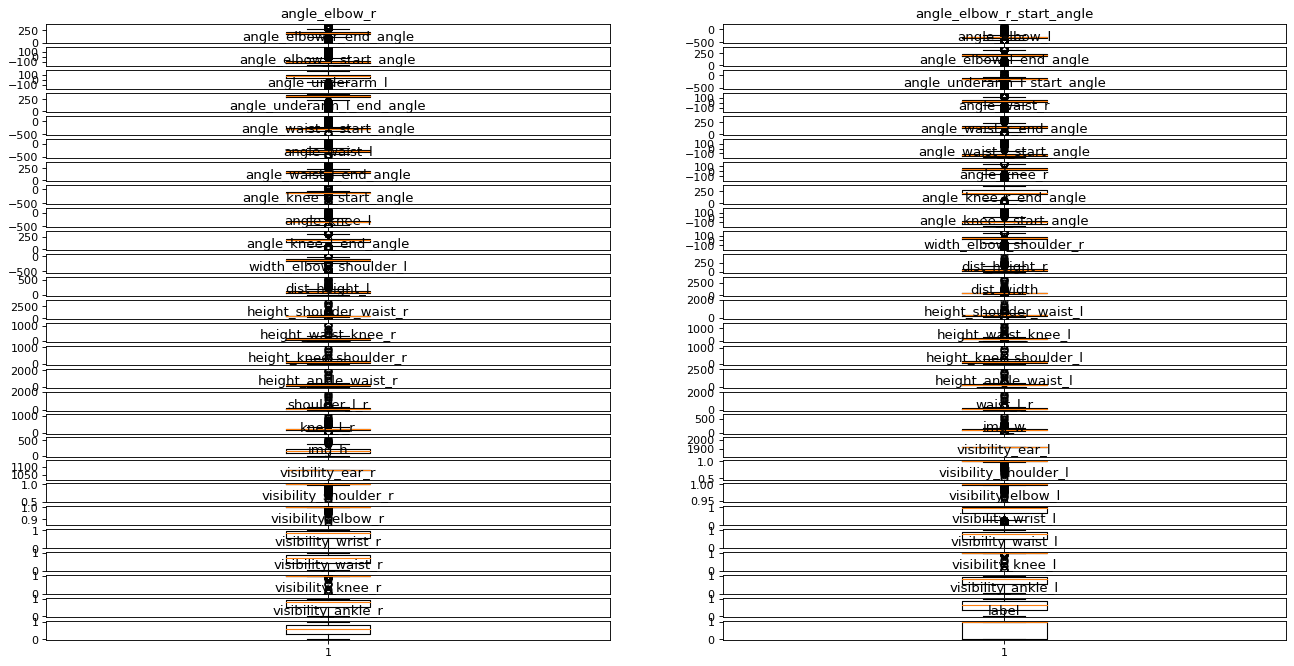

In [70]:
def box_plot(df):
    features = list(df.columns)
    n_features = len(features)
    n_cols = 2
    n_rows = math.ceil(n_features/n_cols)

    plt.figure(figsize=(20, 40), dpi=80)

    for idx, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, idx+1)
        plt.boxplot(df[feature])
        plt.title(feature)
    plt.show()


box_plot(df)